# Load Depenency

In [219]:
#Cleaned up Crypto Example
from os import system
import pandas as pd
import requests
import datetime as dt
# from pytrials.client import ClinicalTrials
import json
import ipywidgets as widgets
import numpy as np
np.random.seed(10031975)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [192]:
from pytrials.utils import json_handler, csv_handler


class ClinicalTrials:
    """ClinicalTrials API client

    Provides functions to easily access the ClinicalTrials.gov API
    (https://clinicaltrials.gov/api/)
    in Python.

    Attributes:
        study_fields: List of all study fields you can use in your query.
        api_info: Tuple containing the API version number and the last
        time the database was updated.
    """

    _BASE_URL = "https://clinicaltrials.gov/api/"
    _INFO = "info/"
    _QUERY = "query/"
    _JSON = "fmt=json"
    _CSV = "fmt=csv"

    def __init__(self):
        self.api_info = self.__api_info()

    @property
    def study_fields(self):
        fields_list = json_handler(
            f"{self._BASE_URL}{self._INFO}study_fields_list?{self._JSON}"
        )
        return fields_list["StudyFields"]["Fields"]

    def __api_info(self):
        """Returns information about the API"""
        last_updated = json_handler(
            f"{self._BASE_URL}{self._INFO}data_vrs?{self._JSON}"
        )["DataVrs"]
        api_version = json_handler(f"{self._BASE_URL}{self._INFO}api_vrs?{self._JSON}")[
            "APIVrs"
        ]

        return api_version, last_updated

    def get_full_studies(self, search_expr, max_studies=50):
        """Returns all content for a maximum of 100 study records.

        Retrieves information from the full studies endpoint, which gets all study fields.
        This endpoint can only output JSON (Or not-supported XML) format and does not allow
        requests for more than 100 studies at once.

        Args:
            search_expr (str): A string containing a search expression as specified by
                `their documentation <https://clinicaltrials.gov/api/gui/ref/syntax#searchExpr>`_.
            max_studies (int): An integer indicating the maximum number of studies to return.
                Defaults to 50.

        Returns:
            dict: Object containing the information queried with the search expression.

        Raises:
            ValueError: The number of studies can only be between 1 and 100
        """
        if max_studies > 100 or max_studies < 1:
            raise ValueError("The number of studies can only be between 1 and 100")

        req = f"full_studies?expr={search_expr}&max_rnk={max_studies}&{self._JSON}"

        full_studies = json_handler(f"{self._BASE_URL}{self._QUERY}{req}")

        return full_studies

    def get_study_fields(self, search_expr, fields, max_studies=50, min_rnk=1,fmt="csv"):
        """Returns study content for specified fields

        Retrieves information from the study fields endpoint, which acquires specified information
        from a large (max 1000) studies. To see a list of all possible fields, check the class'
        study_fields attribute.

        Args:
            search_expr (str): A string containing a search expression as specified by
                `their documentation <https://clinicaltrials.gov/api/gui/ref/syntax#searchExpr>`_.
            fields (list(str)): A list containing the desired information fields.
            max_studies (int): An integer indicating the maximum number of studies to return.
                Defaults to 50.
            fmt (str): A string indicating the output format, csv or json. Defaults to csv.

        Returns:
            Either a dict, if fmt='json', or a list of records (e.g. a list of lists), if fmt='csv.
            Both containing the maximum number of study fields queried using the specified search expression.

        Raises:
            ValueError: The number of studies can only be between 1 and 1000
            ValueError: One of the fields is not valid! Check the study_fields attribute
                for a list of valid ones.
            ValueError: Format argument has to be either 'csv' or 'json'
        """
        if max_studies > 1000 or max_studies < 1:
            raise ValueError("The number of studies can only be between 1 and 1000")
        elif not set(fields).issubset(self.study_fields):
            raise ValueError(
                "One of the fields is not valid! Check the study_fields attribute for a list of valid ones."
            )
        else:
            concat_fields = ",".join(fields)
            # req = f"study_fields?expr={search_expr}&max_rnk={max_studies}&fields={concat_fields}"
            req = f"study_fields?expr={search_expr}&min_rnk={min_rnk}&max_rnk={max_studies+min_rnk-1}&fields={concat_fields}"
            if fmt == "csv":
                url = f"{self._BASE_URL}{self._QUERY}{req}&{self._CSV}"
                return csv_handler(url)

            elif fmt == "json":
                url = f"{self._BASE_URL}{self._QUERY}{req}&{self._JSON}"
                return json_handler(url)

            else:
                raise ValueError("Format argument has to be either 'csv' or 'json'")

    def get_study_count(self, search_expr):
        """Returns study count for specified search expression

        Retrieves the count of studies matching the text entered in search_expr.

        Args:
            search_expr (str): A string containing a search expression as specified by
                `their documentation <https://clinicaltrials.gov/api/gui/ref/syntax#searchExpr>`_.

        Returns:
            An integer

        Raises:
            ValueError: The search expression cannot be blank.
        """
        if not set(search_expr):
            raise ValueError("The search expression cannot be blank.")
        else:
            req = f"study_fields?expr={search_expr}&max_rnk=1&fields=NCTId"
            url = f"{self._BASE_URL}{self._QUERY}{req}&{self._JSON}"
            returned_data = json_handler(url)
            study_count = returned_data["StudyFieldsResponse"]["NStudiesFound"]
            return study_count

    def __repr__(self):
        return f"ClinicalTrials.gov client v{self.api_info[0]}, database last updated {self.api_info[1]}"

# Load Data

https://clinicaltrials.gov/api/gui/ref/crosswalks

Disease 2 search for

This is for dymanic input of diease searching

In [193]:


# name=input()
# print(name)

Richard


hit mesh some day

In [194]:
# pd.DataFrame.from_records(ct_data[1:], columns=ct_data[0])

Pull ONE

#Explore Data

In [195]:
#change this out to NAME

ct = ClinicalTrials()
infodf= (ct.get_full_studies(search_expr="Parkinson", max_studies=5 ))


In [196]:
type(infodf)

dict

In [197]:
number = print(infodf['FullStudiesResponse']['NStudiesFound'])

3662


In [198]:
count = ct.get_study_count(search_expr="Parkinson")


In [199]:
# count = 3000
start = 0
end = count
iter = 999 #number of studies to get at a time ( limited to 1000 )

from random import seed
from random import random



temp = pd.DataFrame()
temp2 = pd.DataFrame()
new_df = pd.DataFrame()


for i in range(1, count, iter):
    # print(temp)
    temp = ct.get_study_fields(
        search_expr="Parkinson",
        fields=["NCTId", "Condition", "OfficialTitle", "BriefTitle" , "Acronym" , "StudyType",
    "InterventionType","InterventionName","InterventionOtherName","InterventionDescription","Phase" 
    ,"StudyFirstSubmitDate","LastUpdateSubmitDate","CompletionDate","OverallStatus","IsFDARegulatedDrug","IsFDARegulatedDevice","BriefSummary"],
        max_studies=iter,
        min_rnk=i,
        fmt="csv",)
    # print(temp2[0])
    temp2 =  pd.DataFrame.from_records(temp[1:])
    new_df = pd.concat([new_df, temp2])
 


In [200]:
new_df.columns = ["index", "NCTId", "Condition", "OfficialTitle", "BriefTitle" , "Acronym" , "StudyType",
    "InterventionType","InterventionName","InterventionOtherName","InterventionDescription","Phase" 
    ,"StudyFirstSubmitDate","LastUpdateSubmitDate","CompletionDate","OverallStatus","IsFDARegulatedDrug","IsFDARegulatedDevice","BriefSummary"]

'NStudiesFound': 3656,

In [201]:
# new_df
new_df.shape

(3662, 19)

In [202]:
new_df.head

<bound method NDFrame.head of     index        NCTId                            Condition  \
0       1  NCT02370134                  Parkinson's Disease   
1       2  NCT01662427                  Parkinson's Disease   
2       3  NCT05245955                    Parkinson Disease   
3       4  NCT03152721                    Parkinson Disease   
4       5  NCT02016092                  Parkinson's Disease   
..    ...          ...                                  ...   
660  3658  NCT03681509  Emotions|Motivation|Reward|Dopamine   
661  3659  NCT02704520                        Rectal Cancer   
662  3660  NCT04370470                   Huntington Disease   
663  3661  NCT05168059                  High Blood Pressure   
664  3662  NCT02069509                  Friedreich's Ataxia   

                                         OfficialTitle  \
0    Development of Parkinson's Glove for Detection...   
1    Nocturnal Parkinson's Disease Symptoms Study G...   
2    Feasibility and Validity of Roboti

In [203]:
# temp = pd.DataFrame.from_records(api_pull_2[1:], columns=api_pull_2[0])

In [204]:
# print(temp.shape)

In [205]:
# count = 3000
start = 0
end = count
iter = 999 #number of studies to get at a time ( limited to 1000 )

from random import seed
from random import random



temp = pd.DataFrame()
temp2 = pd.DataFrame()
new_df2 = pd.DataFrame()


for i in range(1, count, iter):
    # print(temp)
    temp = ct.get_study_fields(
        search_expr="Parkinson",
        fields=["NCTId","IsFDARegulatedDrug","IsFDARegulatedDevice", "IsUnapprovedDevice", "PrimaryOutcomeMeasure", "PrimaryOutcomeDescription","PrimaryOutcomeTimeFrame", "SecondaryOutcomeMeasure","SecondaryOutcomeDescription", "SecondaryOutcomeTimeFrame","OtherOutcomeMeasure"
,"OtherOutcomeDescription","OtherOutcomeTimeFrame","EligibilityCriteria","StudyPopulation","HealthyVolunteers", "ReferencePMID", "LocationCity", "LocationState" , "LocationFacility"],
        max_studies=iter,
        min_rnk=i,
        fmt="csv",)
    # print(temp2[0])
    temp2 =  pd.DataFrame.from_records(temp[1:])
    new_df2 = pd.concat([new_df2, temp2])
 


In [206]:
new_df2.columns = ["index", "NCTId","IsFDARegulatedDrug","IsFDARegulatedDevice", "IsUnapprovedDevice", "PrimaryOutcomeMeasure", "PrimaryOutcomeDescription","PrimaryOutcomeTimeFrame", "SecondaryOutcomeMeasure","SecondaryOutcomeDescription", "SecondaryOutcomeTimeFrame","OtherOutcomeMeasure"
,"OtherOutcomeDescription","OtherOutcomeTimeFrame","EligibilityCriteria","StudyPopulation","HealthyVolunteers", "ReferencePMID", "LocationCity", "LocationState" , "LocationFacility"]

In [207]:
new_df2.shape

(3662, 21)

In [208]:
new_df2

,index,NCTId,IsFDARegulatedDrug,IsFDARegulatedDevice,IsUnapprovedDevice,PrimaryOutcomeMeasure,PrimaryOutcomeDescription,PrimaryOutcomeTimeFrame,SecondaryOutcomeMeasure,SecondaryOutcomeDescription,...,OtherOutcomeMeasure,OtherOutcomeDescription,OtherOutcomeTimeFrame,EligibilityCriteria,StudyPopulation,HealthyVolunteers,ReferencePMID,LocationCity,LocationState,LocationFacility
0,1,NCT02370134,,,,Number of participants who demonstrate the tre...,To determine the tremor suppression after use ...,up to 1 month follow up period,Number of Participants who report pain or any ...,To determine the safety of parkinson's glove|T...,...,,,,Inclusion Criteria:||• Adults ≥ 18 years old.|...,,No,,Pathumwan,Bangkok,Chulalongkorn University Hospital
1,2,NCT01662427,,,,To assess Noctural Parkinson's Disease Symptoms,,,To assess quality of life in Parkinson's Disea...,,...,,,,Inclusion Criteria:||Idiopathic Parkinson's di...,Parkinson's disease patient and care givers,Accepts Healthy Volunteers,,Pathumwan,Bangkok,Roongroj Bhidayasiri
2,3,NCT05245955,No,No,,Detection threshold resulting from the assessm...,Outcome of the assessment for the detection of...,"Through study completion, an average of 2 week...",Demographic information|Edinburgh Handedness I...,"Gender, age, year of birth.|Questionnaire to d...",...,,,,Ten patients with Parkinson's disease and 10 a...,,Accepts Healthy Volunteers,,,,
3,4,NCT03152721,No,No,,Decision to change management,The decision to change management of Parkinson...,"On first regular contact, RC, (telephone or vi...",Actual change of management|Patient Reported E...,A retrospectively verified (medical and prescr...,...,,,,Inclusion Criteria:||Clinical diagnosis of Par...,,No,,Göteborg,,Sahlgrenska University Hospital
4,5,NCT02016092,,,,Biological markers of Parkinson's disease,To identify biologic markers of Parkinson's Di...,18 months,Correlation between biologic markers and clini...,To identify and investigate possible correlati...,...,,,,Inclusion Criteria:||For PD cases:||Inclusion ...,Parkinson's patients,Accepts Healthy Volunteers,,Sunnyvale,California,The Parkinson's Institute and Clinical Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,3658,NCT03681509,No,No,,Change in reward sensitivity on a reinforcemen...,Participants are shown two distinct abstract s...,Completed at day 12 to 15 of treatment,Change in performance in a facial expression r...,Participants are presented with individual pic...,...,Change in subjective mood and energy|Change in...,Zersen's Befindlichkeits-Skala|Positive and Ne...,Completed at day 12 to 15 of treatment|Complet...,Inclusion Criteria:||Male or female|Age: 18 to...,,Accepts Healthy Volunteers,,Oxford,Oxfordshire,"Dept of Psychiatry, University of Oxford"
661,3659,NCT02704520,,,,Patient recruitment rate,Total number of patients randomised per month ...,During last 4 months of recruitment,pathology circumferential resection margin (pC...,Overall pCRM involvement rate between the cont...,...,,,,Inclusion Criteria:||Have a biopsy-confirmed a...,,No,28851403,Aberdeen|Basingstoke|Stoke-on-Trent|Salisbury|...,Aberdeenshire|Hampshire|Staffordshire|Wiltshire,Aberdeen Royal Infirmary - NHS Grampion|Hampsh...
662,3660,NCT04370470,No,No,,The UHDRS SIF ratings|Clinimetric properties o...,The equivalence of the original UHDRS function...,3 weeks|3 weeks,,,...,,,,Inclusion Criteria:||Participants must meet al...,Manifest HDGEC Participants: Manifest HDGEC Pa...,No,,Birmingham|La Jolla|Los Angeles|Englewood|Chic...,Alabama|California|California|Colorado|Illinoi...,The Board of Trustees of the University of Ala...
663,3661,NCT05168059,No,No,,Effectiveness of clevidipine,Percentage of patients achieving target systol...,1 to 6 hour of clevidipine infusion beginning,Incidence of adverse events related to clevidi...,"Tachycardia, atrial fibrillation, hypotension,...",...,Effectiveness of clevidipine treatment accordi...,Percentage of male and female pa

In [209]:




# api_pull_2 = ct.get_study_fields(
#     search_expr="Parkinson",
#     fields=["NCTId"],
#     max_studies=10,
#     min_rnk=5,
#     fmt="csv",
# )

# # ClinicalTrials limits API queries to 1000 records
# # Count of studies may be useful to build loops when you want to retrieve more than 1000 records



# # Read the csv data in Pandas
# import pandas as pd

# temp = pd.DataFrame.from_records(api_pull_2[1:], columns=api_pull_2[0])
# temp

In [210]:




# # Get the NCTId, Condition and Brief title fields from 500 studies related to Coronavirus and Covid, in csv format.
# api_pull_1 = ct.get_study_fields(
#     search_expr="Parkinson",
#     fields=["NCTId", "Condition", "OfficialTitle", "BriefTitle" , "Acronym" , "StudyType",
#     "InterventionType","InterventionName","InterventionOtherName","InterventionDescription","Phase" 
#     ,"StudyFirstSubmitDate","LastUpdateSubmitDate","CompletionDate","OverallStatus","IsFDARegulatedDrug","IsFDARegulatedDevice","BriefSummary"],
#     max_studies=999,
#     fmt="csv",
# )

# # ClinicalTrials limits API queries to 1000 records
# # Count of studies may be useful to build loops when you want to retrieve more than 1000 records



# # Read the csv data in Pandas
# import pandas as pd

# df1=pd.DataFrame.from_records(api_pull_1[1:], columns=api_pull_1[0])

# # 
# # df1 = pd.DataFrame.to_frame().reset_index()



In [211]:
# api_pull_2 = ct.get_study_fields(
#     search_expr="Parkinson",
#     fields=["NCTId","IsFDARegulatedDrug","IsFDARegulatedDevice", "IsUnapprovedDevice", "PrimaryOutcomeMeasure", "PrimaryOutcomeDescription","PrimaryOutcomeTimeFrame", "SecondaryOutcomeMeasure","SecondaryOutcomeDescription", "SecondaryOutcomeTimeFrame","OtherOutcomeMeasure"
# ,"OtherOutcomeDescription","OtherOutcomeTimeFrame","EligibilityCriteria","StudyPopulation","HealthyVolunteers", "ReferencePMID", "LocationCity", "LocationState" , "LocationFacility"

# ],
#     max_studies=999,
#     fmt="csv",
# )

# # ClinicalTrials limits API queries to 1000 records
# # Count of studies may be useful to build loops when you want to retrieve more than 1000 records

# ct.get_study_count(search_expr="Parkinson")

# # Read the csv data in Pandas
# import pandas as pd

# df2 = pd.DataFrame.from_records(api_pull_2[1:], columns=api_pull_2[0])

##cleaning

In [212]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [213]:
result = pd.merge(new_df, new_df2,  on='NCTId', how='outer')

In [214]:
result.shape

(3662, 39)

In [215]:
print(result)

     index_x        NCTId                            Condition  \
0          1  NCT02370134                  Parkinson's Disease   
1          2  NCT01662427                  Parkinson's Disease   
2          3  NCT05245955                    Parkinson Disease   
3          4  NCT03152721                    Parkinson Disease   
4          5  NCT02016092                  Parkinson's Disease   
...      ...          ...                                  ...   
3657    3658  NCT03681509  Emotions|Motivation|Reward|Dopamine   
3658    3659  NCT02704520                        Rectal Cancer   
3659    3660  NCT04370470                   Huntington Disease   
3660    3661  NCT05168059                  High Blood Pressure   
3661    3662  NCT02069509                  Friedreich's Ataxia   

                                          OfficialTitle  \
0     Development of Parkinson's Glove for Detection...   
1     Nocturnal Parkinson's Disease Symptoms Study G...   
2     Feasibility and Validity

Save file

In [216]:
result.to_csv(r'data_raw.csv', index = False)


In [220]:

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (12.8,4.8), #(6.8,4.8)
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,#7
                 "xtick.minor.size"     : 3.5,#3.5
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 'xtick.labelsize'      : 12, #taamaño X
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

In [244]:
labels, levels = pd.factorize(result["Phase"])  

In [245]:
labels

array([0, 1, 2, ..., 1, 1, 1])

In [246]:
# plotdata = result(['Phase'])
# plotdata = plotdata.dropna(['Phase'])
# plotdata = plotdata.dropna(['OverallStatus'])
# plotdata.plot(kind="bar")
result["labels"].plot()


KeyError: 'labels'

NameError: name 'Phase' is not defined

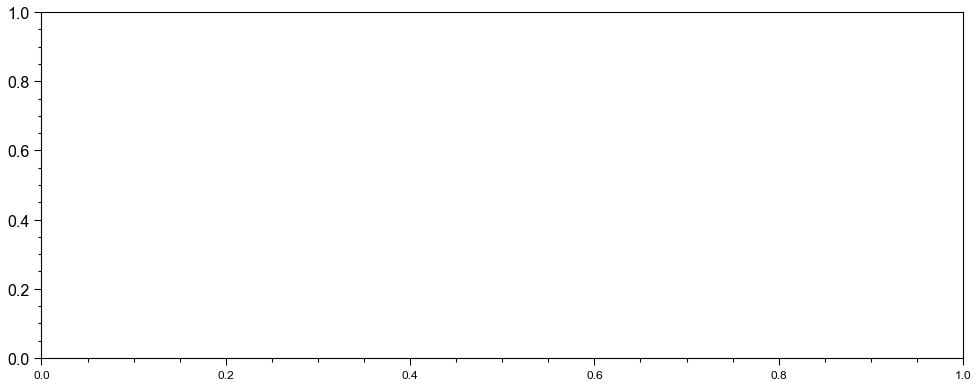

In [226]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Phase)
plt.show()

 
 
 
#  fig3 = plt.figure()
#   dtx['Phase'].value_counts().plot(kind='bar', color='r')
#   plt.legend()
#   plt.show()
#   plt.close(fig3)

In [221]:
# def fun_barplot(name):
#   dtx = pd.read_csv('output/final-tables/hyperlinked/'+name+'.csv', header = 1)

#   stado_n=[]
#   for i in range(len(dtx['Status'])):
#     val=dtx['Status'][i].split(';')[1]
#     stado_n.append(val)
#   dtx['Status_new']=stado_n

#   fig1 = plt.figure()
#   dtx['Status_new'].value_counts().plot(kind='bar', color='g')
#   #plt.savefig("1.png")
#   plt.legend()
#   plt.show()
#   plt.close(fig1)

#   fig2 = plt.figure()
#   dtx['Diagnosis'].value_counts().plot(kind='bar', color='b')
#   plt.legend()
#   plt.show()
#   plt.close(fig2)

#   fig3 = plt.figure()
#   dtx['Phase'].value_counts().plot(kind='bar', color='r')
#   plt.legend()
#   plt.show()
#   plt.close(fig3)




  # fig4 = plt.figure()
  # dtx['Drug'].value_counts('Trails').plot(kind='bar', color='r')
  # plt.legend()
  # plt.show()
  # plt.close(fig4)


  fig5 = plt.figure()
  dtx['Year Registered'].value_counts().plot(kind='bar', color='g')
  plt.legend()
  plt.show()
  plt.close(fig5)

In [224]:
fun_barplot()

TypeError: fun_barplot() missing 1 required positional argument: 'name'